# Tensor-product grids

We will consider Poisson on a rectangle $\Omega = [a,b]\times [c,d]$. If $x_0,\dots,x_m$ is a sequence of nodes in $[a,b]$, and $y_0,\dots,y_n$ is a sequence of nodes in $[c,d]$, then a natural grid on the rectangle is the **tensor-product grid**

$$
(x_i,y_j), \quad i=0,\ldots,m,\, j=0,\ldots,n. 
$$

This makes it natural to represent a function $u(x,y)$ as the matrix $\bfU$, where

$$
U_{ij} = u(x_i,y_j). 
$$

```{caution}
There is potential for confusion because the first dimension of a matrix varies in the vertical direction, while the first coordinate $x$ varies horizontally. In fact, the Julia plotting routines we use expect the transpose of this arrangement, so that $x$ varies along columns and $y$ along rows.
```

::::{prf:example}
Let the interval $[0,2]$ be divided into $m=4$ equally sized pieces, and let $[1,3]$ be discretized in $n=2$ equal pieces. Then the grid in the rectangle $[0,2]\times[1,3]$ is given by all points $(i/2,1+j)$ for all choices $i=0,1,2,3,4$ and $j=0,1,2$. If $f(x,y)=\sin(\pi xy)$, then

$$
  \text{mtx}(f) =
    \begin{bmatrix}
    \sin(\pi\cdot 0\cdot 1) & \sin(\pi\cdot0\cdot 2) & \sin(\pi\cdot0\cdot 3) \\[1mm]
    \sin\left(\pi\cdot\tfrac{1}{2} \cdot 1 \right) & \sin\left(\pi\cdot\tfrac{1}{2} \cdot 2 \right) & \sin\left(\pi\cdot\tfrac{1}{2} \cdot 3 \right) \\[1mm]
    \sin\left(\pi \cdot 1 \cdot 1 \right) & \sin\left(\pi \cdot 1 \cdot 2 \right) & \sin\left(\pi \cdot 1 \cdot 3 \right) \\[1mm]
    \sin\left(\pi\cdot \tfrac{3}{2} \cdot 1 \right) & \sin\left(\pi\cdot\tfrac{3}{2} \cdot 2 \right) & \sin\left(\pi\cdot\tfrac{3}{2} \cdot 3 \right) \\[1mm]
    \sin\left(\pi \cdot 2 \cdot 1 \right) & \sin\left(\pi \cdot 2 \cdot 2 \right) & \sin\left(\pi \cdot 2 \cdot 3 \right)
    \end{bmatrix}
    = \begin{bmatrix}
    0 & 0 & 0 \\ 1 & 0 & -1 \\ 0 & 0 & 0 \\ -1 & 0 & 1 \\ 0 & 0 & 0
    \end{bmatrix}.
$$
::::

Here is the grid from this example.

In [1]:
m = 4;   x = range(0,2,m+1);
n = 2;   y = range(1,3,n+1);

For a given $f(x,y)$ we can find $\operatorname{mtx}(f)$ by using a comprehension syntax.

In [2]:
f = (x,y) -> cos(π*x*y-y)
F = [ f(x,y) for x in x, y in y ]

5×3 Matrix{Float64}:
  0.540302  -0.416147  -0.989992
  0.841471   0.416147  -0.14112
 -0.540302  -0.416147   0.989992
 -0.841471   0.416147   0.14112
  0.540302  -0.416147  -0.989992

<!-- The plots of this section look better using a different graphics engine on the back end: -->

In [3]:
using Plots

We can make a nice plot of the function by first choosing a much finer grid. However, the contour and surface plotting functions expect the *transpose* of mtx($f$).

To emphasize departures from a zero level, use a colormap such as `bluesreds`, and use `clims` to set balanced color differences.

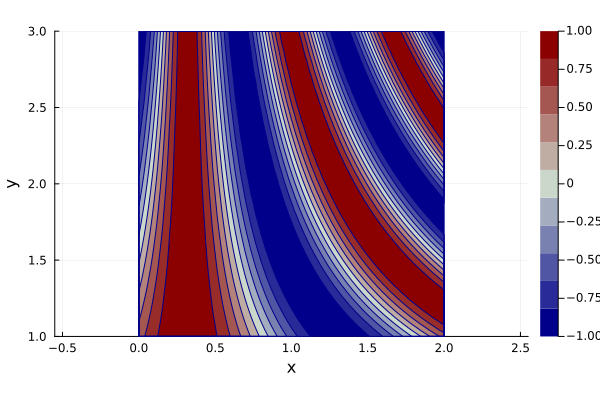

In [4]:
m = 60;   x = range(0,2,m+1);
n = 48;   y = range(1,3,n+1);
F = [ f(x,y) for x in x, y in y ];

plot(x,y,F',levels=10,fill=true,aspect_ratio=1,
    color=:bluesreds,clims=(-1,1),
    xlabel="x",ylabel="y")

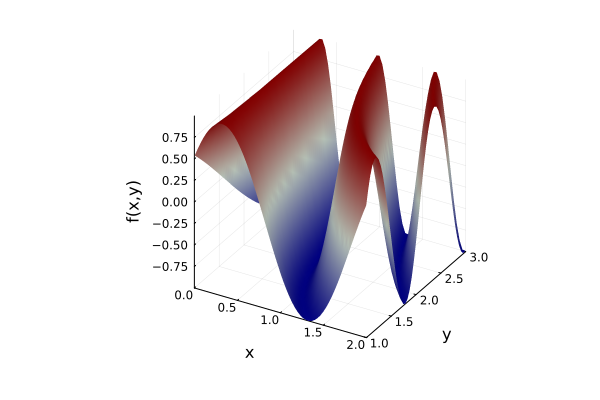

In [5]:
surface(x,y,F',l=0,leg=:none,
    color=:bluesreds,clims=(-1,1),
    xlabel="x",ylabel="y",zlabel="f(x,y)")

## Parameterized surfaces

We are not limited to rectangles by tensor products. Many regions and surfaces may be parameterized by means of $x(u,v)$, $y(u,v)$, and $z(u,v)$, where $u$ and $v$ lie in a rectangle. Such "logically rectangular" surfaces include the unit disk,

:::{math}
:label: unitdiskparam
\left\{
\begin{aligned}
x &= u \cos v, \\
y &= u \sin v,\\
\end{aligned}
\right.
\qquad \qquad
\left.
\begin{aligned}
0 & \le u < 1, \\
0 &\le v \le 2\pi,
\end{aligned}
\right.
:::

and the unit sphere,

:::{math}
:label: spheredomain
\left\{
\begin{aligned}
x &= \cos u \sin v,\\
y &= \sin u \sin v,\\
z &= \cos v,
\end{aligned}
\right.
\qquad \qquad
  \left.
\begin{aligned}
0 & \le u < 2\pi, \\
0 &\le v \le \pi.
\end{aligned}
\right.
:::

For a function given in polar form, such as $f(r,\theta)=1-r^4$, construction of a function over the unit disk is straightforward using a grid in $(r,\theta)$ space.

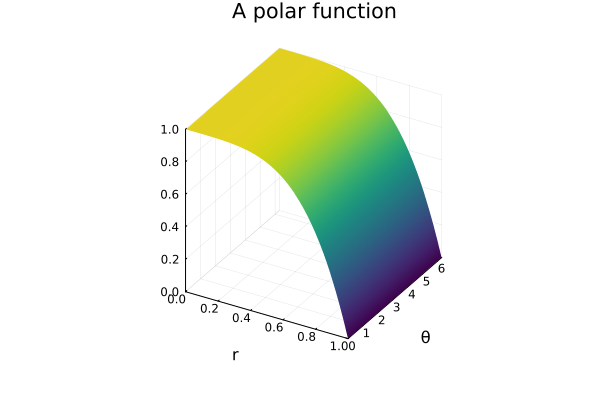

In [6]:
r = range(0,1,length=41)
θ = range(0,2π,length=81)
F = [ 1-r^4 for r in r, θ in θ ]

surface(r,θ,F',legend=:none,l=0,color=:viridis,
    xlabel="r",ylabel="θ",title="A polar function")

Of course, we are used to seeing such plots over the $(x,y)$ plane, not the $(r,\theta)$ plane. For this we create matrices for the coordinate functions $x$ and $y$.

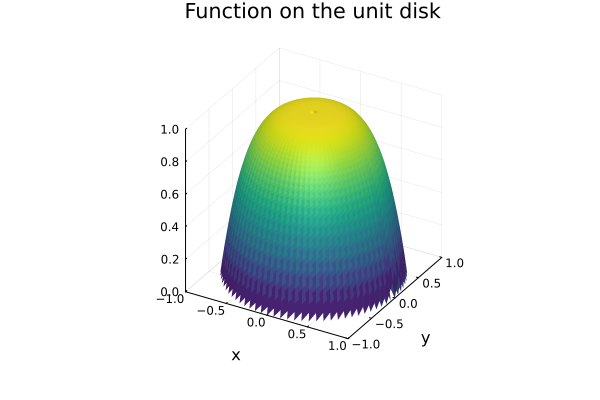

In [7]:
X = [ r*cos(θ) for r in r, θ in θ ]
Y = [ r*sin(θ) for r in r, θ in θ ]

surface(X',Y',F',legend=:none,l=0,color=:viridis,
    xlabel="x",ylabel="y",title="Function on the unit disk")

In such functions the values along the line $r=0$ must be identical, and the values on the line $\theta=0$ should be identical to those on $\theta=2\pi$. Otherwise the interpretation of the domain as the unit disk is nonsensical. If the function is defined in terms of $x$ and $y$, then those can be defined in terms of $r$ and $\theta$ using {eq}`unitdiskparam`.

On the unit sphere, we can use color to indicate a function value. Here is a plot of the function $f(x,y,z) = x y z^3$. Since we need coordinate function matrices for the plot, we also use them to evaluate $f$ on the grid.

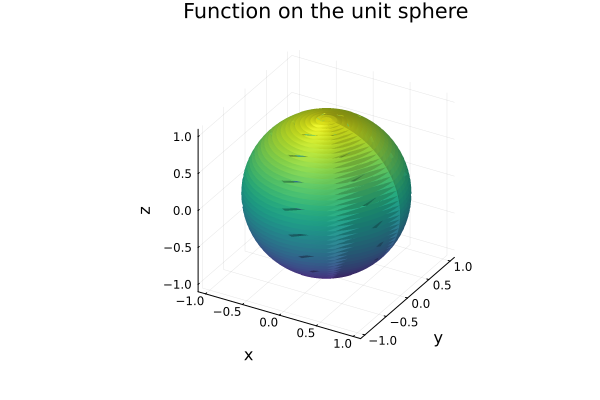

In [8]:
θ = range(0,2π,length=61)
ϕ = range(0,π,length=51)

X = [ cos(θ)*sin(ϕ) for θ in θ, ϕ in ϕ ]
Y = [ sin(θ)*sin(ϕ) for θ in θ, ϕ in ϕ ]
Z = [ cos(ϕ) for θ in θ, ϕ in ϕ ]

F =  @. X*Y*Z^3
surface(X',Y',Z',fill_z=F',l=0,leg=:none,color=:viridis,
    xlims=(-1.1,1.1),ylims=(-1.1,1.1),zlims=(-1.1,1.1),
    xlabel="x",ylabel="y",zlabel="z",
    title="Function on the unit sphere")

## Partial derivatives

In order to solve boundary-value problems in one dimension by collocation, we replaced an unknown function $u(x)$ by a vector of its values at selected nodes and discretized the derivatives in the equation using differentiation matrices. We use the same ideas in the 2D case: we represent a function by its values on a grid, and multiplication by differentiation matrices to construct discrete analogs of the partial derivatives $\frac{\partial u}{\partial x}$ and $\frac{\partial u}{\partial y}$.

Consider first $\frac{\partial u}{\partial x}$. In the definition of this partial derivative, the independent variable $y$ is held constant. Note that $y$ is constant within each column of $\mathbf{U} = \mtx(u)$. Thus, we may regard a single column $\mathbf{u}_j$ as a discretized function of $x$ and, as usual, left-multiply by a differentiation matrix $\mathbf{D}_x$. We need to do this for each column of $\mathbf{U}$ by $\mathbf{D}_x$, which is accomplished by $\mathbf{D}_x \mathbf{U}$. Altogether,

:::{math}
  :label: partfpartx
  \mtx\left( \frac{\partial u}{\partial x} \right) \approx \mathbf{D}_x \, \mtx(u).
:::

This relation is not an equality, because the left-hand side is a discretization of the exact partial derivative, while the right-hand side is a finite-difference approximation. Yet it is a natural analog for partial differentiation when we are given not $u(x,y)$ but only the grid value matrix $\mathbf{U}$.

Now we tackle $\frac{\partial u}{\partial y}$. Here the inactive coordinate $x$ is held fixed within each *row* of $\mathbf{U}$. However, if we transpose $\mathbf{U}$, then the roles of rows and columns are swapped, and now $y$ varies independently down each column. This is analogous to the situation for the $x$-derivative, so we left-multiply by a finite-difference matrix $\mathbf{D}_y$, and then transpose the entire result to restore the roles of $x$ and $y$ in the grid. Fortunately, linear algebra allows us to express the sequence transpose–left-multiply–transpose more compactly:

:::{math}
:label: partfparty
\mtx\left( \frac{\partial u}{\partial y} \right) \approx \Bigl(\mathbf{D}_y \mathbf{U}^T\Bigr)^T = \mtx(u)\, \mathbf{D}_y^T.
:::

Keep in mind that the differentiation matrix $\mathbf{D}_x$ is based on the discretization $x_0,\ldots,x_m$, and as such it must be $(m+1)\times (m+1)$. On the other hand, $\mathbf{D}_y$ is based on $y_0,\ldots,y_n$ and is $(n+1)\times (n+1)$. This is exactly what is needed dimensionally to make the products consistent. 

We define a function and, for reference, its two exact partial derivatives.

In [9]:
u = (x,y) -> sin(π*x*y-y);
∂u_∂x = (x,y) -> π*y*cos(πx*y-y);
∂u_∂y = (x,y) -> (π*x-1)*cos(π*x*y-y);

In [10]:
foreach(println,readlines("diffmats.jl"))

using LinearAlgebra,SparseArrays
function diffmats(m,a,b)
    # assumes evenly spaced nodes
    h = (b-a)/m
    x = [ a+i*h for i in 0:m ]
    Dx = 1/2h*spdiagm(-1=>[-ones(m-1);-2],0=>[-2;zeros(m-1);2],1=>[2;ones(m-1)])
    Dxx = 1/h^2*spdiagm(-1=>[ones(m-1);-2],0=>[1;-2*ones(m-1);1],1=>[-2;ones(m-1)])
    Dxx[m+1,m-1] = Dxx[1,3] = 1/h^2
    return x,Dx,Dxx
end


We use an equispaced grid and second-order finite differences.

In [11]:
include("diffmats.jl")
x,Dx,_ = diffmats(m,0,2)
y,Dy,_ = diffmats(n,1,3)
mtx = (f,x,y) -> [ f(x,y) for x in x, y in y ]
U = mtx(u,x,y)
∂xU = Dx*U;
∂yU = U*Dy';

Now we compare the exact $\frac{\partial u}{\partial y}$ with its finite-difference approximation.

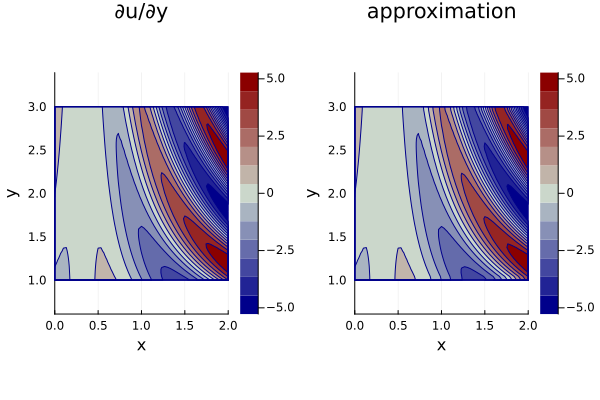

In [12]:
M = maximum(abs,∂yU)    # find the range of the result
plot(layout=(1,2),aspect_ratio=1,clims=(-M,M),xlabel="x",ylabel="y")
contour!(x,y,mtx(∂u_∂y,x,y)',layout=(1,2),levels=12,
    fill=true,color=:bluesreds,title="∂u/∂y")      
contour!(x,y,∂yU',subplot=2,levels=12,
    fill=true,color=:bluesreds,title="approximation")

To the eye there is little difference to be seen, though the results have no more than a few correct digits at these discretization sizes:

In [13]:
exact = mtx(∂u_∂y,x,y)
# Relative difference in Frobenius norm:
norm(exact-∂yU) / norm(exact)

0.01961274665432435